#**1. Basic Data Loading and Data Preparation**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

data_raw = 'final.csv'


In [ ]:
data = pd.read_csv(data_raw)

FileNotFoundError: [Errno 2] No such file or directory: 'final.csv'

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
df = data

In [ ]:
df.drop_duplicates()

In [ ]:
df.describe().T

In [ ]:
df['classification'].value_counts()

**Stopwords removal**

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.fileids())

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
indian_stopwords = set(stopwords.words('hinglish'))
print(indian_stopwords)
df['message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in indian_stopwords]))
print(df.head())

In [ ]:
hindi_stopwords = {
    'के', 'का', 'एक', 'में', 'है', 'यह', 'और', 'से', 'हैं', 'को', 'पर', 'इस', 'होता', 'कि', 'जो', 'कर', 'मे',
    'गया', 'करने', 'किया', 'लिया', 'गये', 'अपने', 'हो', 'उन्हें', 'भी', 'पे', 'जैसा', 'तक', 'उनकी', 'ही',
    'अभी', 'इसके', 'साथ', 'अपना', 'आप', 'पूरी', 'उसके', 'बिलकुल', 'भीतर', 'उनका', 'था', 'सकते', 'इसमें',
    'दो', 'होने', 'वह', 'वे', 'करते', 'बहुत', 'कुछ', 'वो', 'करना', 'वर्ग', 'कई', 'करें', 'होती', 'अपनी',
    'उनको', 'जा', 'कहा', 'हुआ', 'जब', 'होते', 'कोई', 'हुई', 'वहाँ', 'जहाँ', 'मेरे', 'कुछ', 'सभी', 'करता',
    'उनकी', 'तरह', 'उस', 'आदि'}

df['message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in hindi_stopwords]))

print(df.head())

In [ ]:
from collections import Counter


all_words = ' '.join(df['message']).split()
word_freq = Counter(all_words)

most_common_words = word_freq.most_common(60)

print(most_common_words)



In [ ]:
df.head()

# **2. Feature Inclusion and Selection**

In [ ]:
#1. word count
df['word_count'] = df['message'].apply(lambda x: len(x.split()))


In [ ]:
#2. character count
df['char_count'] = df['message'].apply(len)

counts all characters in the string, including:

    Letters: Hindi or any other script.
    Spaces.
    Punctuation marks: Periods, commas, exclamation marks, etc.
    Special characters: @, #, $, etc.
    Digits.

In [ ]:
#3.  average word length
df['avg_word_length'] = df['char_count'] / (df['word_count'] + 1e-5)


In [ ]:
#4. punctuations count (used for spam detection...exclamatory marks and all)
import string
df['punctuation_count'] = df['message'].apply(lambda x: sum(1 for char in x if char in string.punctuation))


In [ ]:
#5. link counting (important part...easy for spam detection if exists)
import re
df['link_count'] = df['message'].apply(lambda x: len(re.findall(
    r'((https?://|www\.|[a-zA-Z0-9.-]+\.[a-zA-Z]{2,})(\S*)|'
    r'\b(bit\.ly|wa\.me|t\.co|tinyurl\.com|goo\.gl|shorte\.st|'
    r'ow\.ly|is\.gd|buff\.ly|adf\.ly|bitly\.com|tr\.im|'
    r'cutt\.ly|rb\.gy|bl\.ink|cli\.ck|rebrand\.ly|'
    r'lnkd\.in|t2m\.io|v\.gd|yourls\.org|snipurl\.com|'
    r'soo\.gd|qr\.ae|x\.co|clck\.ru|surl\.cn)\b)', x)))


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.3 MB/s eta 0:00:00


In [ ]:
#6. Emoji Count
import emoji
df['emoji_count'] = df['message'].apply(lambda x: sum(1 for char in x if emoji.is_emoji(char)))


In [ ]:
df

,message,classification,word_count,char_count,avg_word_length,punctuation_count,link_count,emoji_count
0,डॉलर ख़रीदारी ख़रीदारी लिए घर जाएँ समय। मैं हि...,ham,15,76,5.066663,0,0,0
1,"हर छोटी कोशिश बड़ा परिणाम है, उसे नजरअंदाज न क...",ham,10,50,4.999995,1,0,0
2,क्या तुमने पिछले संदेश जवाब दिया?,ham,6,33,5.499991,1,0,0
3,प्रति जोड़ा *मनाली 3एन/4डी@14 999 *शिमला 2एन3ड...,spam,21,155,7.380949,10,0,0
4,बिबाह समस्या?❤️ प्यार पाने सही तरीका जानिए।🌟 1...,spam,17,114,6.705878,2,0,4
...,...,...,...,...,...,...,...,...
3889,"मैं सोने रहा हूं... मुझे अब पढ़ाई मन नहीं है, ...",ham,25,140,5.599998,10,0,0
3890,हमने मुफ्त जियो मोबाइल + मुफ्त कैमकॉर्डर लिए ह...,spam,23,133,5.782606,1,0,0
3891,"मैं चाहता हूं मुझे बताएं कोलग क्या होगा, क्या ...",ham,43,235,5.465115,6,0,0
3892,मैं आपको प्यार हूं!,ham,4,19,4.749988,1,0,0


In [ ]:
#8. currency symbol and money count (another important step)
import re

currency_symbols = ['₹', '$', '€', '£', '¥', '₽', '₩', '₺', '₱', 'Rs', 'rs', 'रुपये', 'रु']
money_pattern = re.compile(r'\b\d{1,4}(,\d{3})*(\.\d{1,2})?\b')

def count_currency_symbols(message):
    symbol_count = sum(1 for char in message if char in currency_symbols)
    money_count = len(money_pattern.findall(message))
    return symbol_count + money_count

df['currency_symbol_count'] = df['message'].apply(count_currency_symbols)



In [ ]:
#9. phone number count
import re

# Generalized phone number pattern
phone_number_pattern = r'(\+?\d{1,4}[-\s]?)?(0)?[1-9]\d{8,13}\b'

df['phone_number_count'] = df['message'].apply(
    lambda x: len(re.findall(phone_number_pattern, x))
)


# **4. Advanced Features**

In [ ]:
#10. english character count
import re

df['english_char_count'] = df['message'].apply(
    lambda x: len(re.findall(r'[a-zA-Z]', x)))


In [ ]:
#11. total unique words count ( this will help us when divided with the ratio, as spam sometimes has values repeated)
df['unique_word_count'] = df['message'].apply(lambda x: len(set(x.split())))


In [ ]:
#12. unique ratio
df['unique_total_ratio'] = df['unique_word_count'] / (df['word_count'])


# **5. Readability Scores using text-stat metrics**


1.   Flesch Reading Scale
2.   Gunning Fog
3. Smog Index



In [ ]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.8 MB/s eta 0:00:00


In [ ]:
#13. Readability Scores

import textstat

df['flesch_reading_ease'] = df['message'].apply(lambda x: textstat.flesch_reading_ease(x))
df['gunning_fog'] = df['message'].apply(lambda x: textstat.gunning_fog(x))
df['smog_index'] = df['message'].apply(lambda x: textstat.smog_index(x))


In [ ]:
#I want to find an equation to calculate all three of these reading score as a single reading score using some constants.
#avg reading score = ((flesh + gunning + 2(smog))/3) 1e-2

In [ ]:
df['average_readability'] = ((3*df['flesch_reading_ease'] - 3*df['gunning_fog'] - (3*(df['smog_index'])))) / 4


In [ ]:
#14. Sentences count and length using reg-ex
import re
df['sentence_count'] = df['message'].apply(lambda x: len(re.split('[।|?|!]', x)))
df['avg_sentence_length'] = df['message'].apply(lambda x: len(x.split()) / max(1, len(re.split('[।|?|!]', x))))


In [ ]:
df

,message,classification,word_count,char_count,avg_word_length,punctuation_count,link_count,emoji_count,currency_symbol_count,phone_number_count,english_char_count,unique_word_count,unique_total_ratio,flesch_reading_ease,gunning_fog,smog_index,average_readability,sentence_count,avg_sentence_length
0,डॉलर ख़रीदारी ख़रीदारी लिए घर जाएँ समय। मैं हि...,ham,15,76,5.066663,0,0,0,0,0,0,14,0.933333,107.01,6.00,0.0,75.7575,4,3.750000
1,"हर छोटी कोशिश बड़ा परिणाम है, उसे नजरअंदाज न क...",ham,10,50,4.999995,1,0,0,0,0,0,10,1.000000,112.09,4.00,0.0,81.0675,2,5.000000
2,क्या तुमने पिछले संदेश जवाब दिया?,ham,6,33,5.499991,1,0,0,0,0,0,6,1.000000,116.15,2.40,0.0,85.3125,2,3.000000
3,प्रति जोड़ा *मनाली 3एन/4डी@14 999 *शिमला 2एन3ड...,spam,21,155,7.380949,10,0,0,6,0,0,20,0.952381,100.92,8.40,0.0,69.3900,1,21.000000
4,बिबाह समस्या?❤️ प्यार पाने सही तरीका जानिए।🌟 1...,spam,17,114,6.705878,2,0,4,1,1,0,17,1.000000,104.98,6.80,0.0,73.6350,5,3.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,"मैं सोने रहा हूं... मुझे अब पढ़ाई मन नहीं है, ...",ham,25,140,5.599998,10,0,0,0,0,0,23,0.920000,115.84,2.52,3.1,82.6650,2,12.500000
3890,हमने मुफ्त जियो मोबाइल + मुफ्त कैमकॉर्डर लिए ह...,spam,23,133,5.782606,1,0,0,0,1,0,20,0.869565,99.91,8.80,0.0,68.3325,2,11.500000
3891,"मैं चाहता हूं मुझे बताएं कोलग क्या होगा, क्या ...",ham,43,235,5.465115,6,0,0,0,0,0,33,0.767442,100.41,8.60,0.0,68.8575,6,7.166667
3892,मैं आपको प्यार हूं!,ham,4,19,4.749988,1,0,0,0,0,0,4,1.000000,118.18,1.60,0.0,87.4350,2,2.000000


# **6. Accuracy Metrics**

In [ ]:
df3=df

In [ ]:
df3.to_excel("df3_output.xlsx", index=False)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Extract features and labels
X = df3['message']  # Text column
y = df3['classification'] # Target column (ham/spam)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to numeric features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = nb_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.2f}")

# Print a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

         ham       0.88      0.97      0.93       531
        spam       0.92      0.73      0.81       248

    accuracy                           0.89       779
   macro avg       0.90      0.85      0.87       779
weighted avg       0.90      0.89      0.89       779



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example classifier
from sklearn.metrics import accuracy_score

In [ ]:
def extract_features(df3):
    features = pd.concat(
        [
            df3[['word_count', 'char_count', 'avg_word_length', 'punctuation_count', 'link_count', 'emoji_count', 'currency_symbol_count', 'phone_number_count', 'english_char_count', 'unique_word_count', 'unique_total_ratio', 'flesch_reading_ease', 'gunning_fog', 'smog_index', 'average_readability', 'sentence_count', 'avg_sentence_length']],
        ],
        axis=1
    )
    return features

features = extract_features(df3)

In [ ]:
# Assuming 'features' is your DataFrame with extracted features and 'labels' is your target
X = features  # Features
y = df3['classification']    # Labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 91.91%


In [ ]:
# prompt: calculate accuracy, precision, recall and f1 score for random forest using lazy predict

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ... (Your existing code) ...

# Assuming 'features' is your DataFrame with extracted features and 'labels' is your target
X = features  # Features
y = df3['classification']    # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 91.91%
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


In [ ]:
!pip install lazypredict

In [ ]:
!import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

/bin/bash: line 1: import: command not found


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
 97%|█████████▋| 31/32 [00:08<00:00,  5.77it/s]

[LightGBM] [Info] Number of positive: 1156, number of negative: 1959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1450
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371108 -> initscore=-0.527468
[LightGBM] [Info] Start training from score -0.527468


100%|██████████| 32/32 [00:09<00:00,  3.29it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.92               0.91    None      0.92   
LGBMClassifier                     0.92               0.91    None      0.92   
RandomForestClassifier             0.92               0.91    None      0.92   
SVC                                0.92               0.90    None      0.92   
KNeighborsClassifier               0.91               0.89    None      0.91   
BaggingClassifier                  0.91               0.89    None      0.91   
DecisionTreeClassifier             0.89               0.87    None      0.89   
LabelSpreading                     0.89               0.87    None      0.89   
LabelPropagation                   0.89               0.87    None      0.89   
AdaBoostClassifier                 0.89               0.86    None      0.89   
PassiveAggressiveClassifier        0.86 

# **7.2 Binary Class Conversion**

In [ ]:
df5=df3

In [ ]:
df5.drop('message', axis=1, inplace=True)

In [ ]:

df5['classification'] = df5['classification'].map({'spam': 1, 'ham': 0})

In [ ]:
df5.drop('smog_index', axis=1, inplace=True)

In [ ]:

df5['char_count'] = df5['char_count'].apply(lambda x: 1 if x > 75 else 0)

In [ ]:
df5['avg_word_length'] = df5['avg_word_length'].apply(lambda x: 1 if x > 5.4 else 0)

In [ ]:
df5['link_count'] = df5['link_count'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df5['punctuation_count'] = df5['punctuation_count'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df5['emoji_count'] = df5['emoji_count'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df5['currency_symbol_count'] = df5['currency_symbol_count'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df5['phone_number_count'] = df5['phone_number_count'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df5['english_char_count'] = df5['english_char_count'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df5.drop('unique_word_count', axis=1, inplace=True)

In [ ]:
df5['unique_total_ratio'] = df5['unique_total_ratio'].apply(lambda x: 1 if x < 0.98 else 0)

In [ ]:
df5['flesch_reading_ease'] = df5['flesch_reading_ease'].apply(lambda x: 1 if x < 105 else 0)

In [ ]:
df5['gunning_fog'] = df5['gunning_fog'].apply(lambda x: 1 if x > 4.6 else 0)

In [ ]:
df5['average_readability'] = df5['average_readability'].apply(lambda x: 1 if x < 79.22 else 0)

In [ ]:
df5.drop('sentence_count', axis=1, inplace=True)

In [ ]:
df5.drop('word_count', axis=1, inplace=True)

In [ ]:
df5['avg_sentence_length'] = df5['avg_sentence_length'].apply(lambda x: 1 if x > 11 else 0)

In [ ]:
df5

,classification,char_count,avg_word_length,punctuation_count,link_count,emoji_count,currency_symbol_count,phone_number_count,english_char_count,unique_total_ratio,flesch_reading_ease,gunning_fog,average_readability,avg_sentence_length
0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,1,0,0,1,1,1,1,1
4,1,1,1,1,0,1,1,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,0,1,1,1,0,0,0,0,0,1,0,0,0,1
3890,1,1,1,1,0,0,0,1,0,1,1,1,1,1
3891,0,1,1,1,0,0,0,0,0,1,1,1,1,0
3892,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_save = df5

In [ ]:
# prompt: download and save df_save

from google.colab import files
df_save.to_csv('df_save.csv', encoding = 'utf-8-sig')
files.download('df_save.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **7.2.2 SHAP**

In [ ]:
df7=df_save

In [ ]:
if "Unnamed: 0" in df_save.columns:
    df_save = df_save.drop(columns=["Unnamed: 0"])

In [ ]:
df_save

,classification,char_count,avg_word_length,punctuation_count,link_count,emoji_count,currency_symbol_count,phone_number_count,english_char_count,unique_total_ratio,flesch_reading_ease,gunning_fog,average_readability,avg_sentence_length
0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,1,0,0,1,1,1,1,1
4,1,1,1,1,0,1,1,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,0,1,1,1,0,0,0,0,0,1,0,0,0,1
3890,1,1,1,1,0,0,0,1,0,1,1,1,1,1
3891,0,1,1,1,0,0,0,0,0,1,1,1,1,0
3892,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
!pip install shap

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
import shap as shap

100%|===================| 3109/3115 [01:07<00:00]       

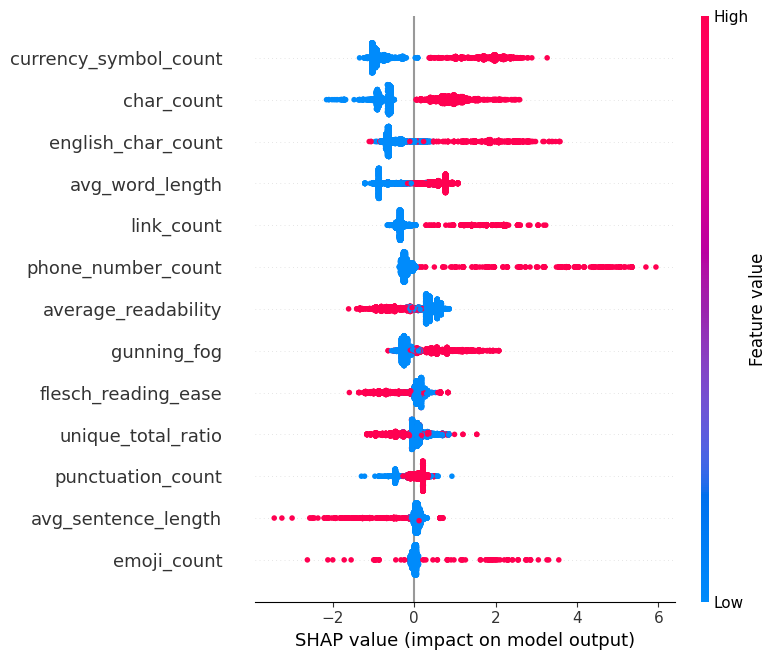

In [ ]:
if "Unnamed: 0" in df_save.columns:
    df_save = df_save.drop(columns=["Unnamed: 0"])

X = df_save.drop(columns=["classification"])
y = df_save["classification"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(
    objective="binary:logistic",
    max_depth=3,
    n_estimators=1000,
    use_label_encoder=False,
    eval_metric="logloss"
)
model.fit(X_train, y_train)

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)


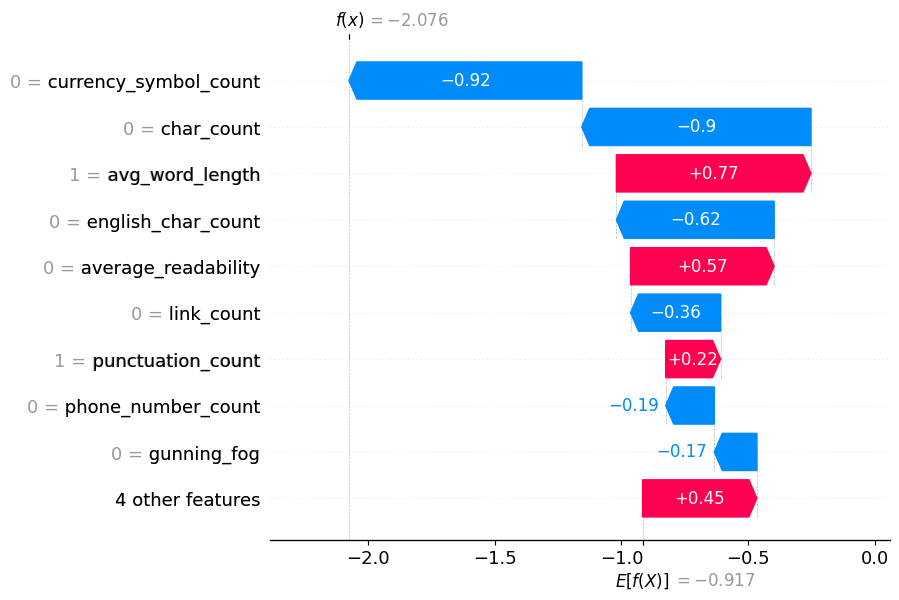

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
df4=df_save

In [ ]:
def extract_features(df4):
    features = pd.concat(
        [
            df4[[ 'char_count', 'avg_word_length', 'punctuation_count', 'link_count', 'emoji_count', 'currency_symbol_count', 'phone_number_count', 'english_char_count', 'gunning_fog', 'average_readability']],
        ],
        axis=1
    )
    return features

features = extract_features(df4)

 99%|===================| 3086/3115 [00:44<00:00]       

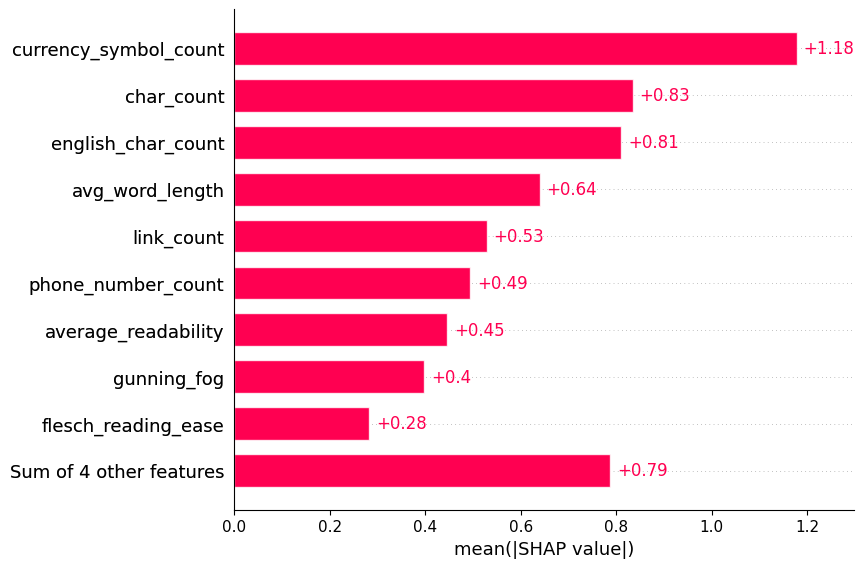

In [ ]:
# prompt: most important features for class 1

import pandas as pd
import shap

# Assuming df_save is your DataFrame with the processed features and 'classification' column

# Separate features (X) and target variable (y)
X = df_save.drop(columns=["classification"])
y = df_save["classification"]

# ... (Your model training code as before) ...

# Use SHAP to explain the model's predictions
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# SHAP bar plot (shows feature importance based on mean absolute SHAP values)
shap.plots.bar(shap_values)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example classifier
from sklearn.metrics import accuracy_score

In [ ]:
df6=df_save

In [ ]:
def extract_features(df6):
    features = pd.concat(
        [
            df6[['char_count', 'punctuation_count', 'link_count', 'currency_symbol_count', 'phone_number_count', 'english_char_count', 'gunning_fog', 'avg_word_length', 'avg_sentence_length']],
        ],
        axis=1
    )

    return features

features = extract_features(df6)

In [ ]:
# Assuming 'features' is your DataFrame with extracted features and 'labels' is your target
X = features  # Features}
y = df6['classification']    # Labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 92.55%


In [ ]:
# prompt: calculate accuracy, precision, recall and f1 score for random forest using lazy predict

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ... (Your existing code) ...

# Assuming 'features' is your DataFrame with extracted features and 'labels' is your target
X = features  # Features
y = df['classification']    # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 92.55%
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


In [ ]:
!import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

/bin/bash: line 1: import: command not found


100%|██████████| 32/32 [00:03<00:00, 10.01it/s]

[LightGBM] [Info] Number of positive: 1156, number of negative: 1959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371108 -> initscore=-0.527468
[LightGBM] [Info] Start training from score -0.527468
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DecisionTreeClassifier             0.93               0.92     0.92      0.93   
ExtraTreeClassifier                0.93               0.92     0.92      0.93   
ExtraTreesClassifier               0.93               0.92     0.92      0.93   
RandomForestClassifier             0.93               0.92     0.92      0.93   
LabelPropagation          

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Apply RFE
rfe = RFE(estimator=rf, n_features_to_select=7)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Get selected features
selected_features = X_train.columns[rfe.support_].tolist()
print("Selected Features:", selected_features)


Selected Features: ['char_count', 'link_count', 'currency_symbol_count', 'phone_number_count', 'english_char_count', 'gunning_fog', 'avg_word_length']


# **FEATURE SELECTION**

In [ ]:
!pip install skrebate

  Preparing metadata (setup.py) ... done
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29256 sha256=db6e93b13558a4dc737b7ec6d2ee92004d21baef184579505789947e3d071209
  Stored in directory: /root/.cache/pip/wheels/8a/d2/67/8368fca718041057b33d6448ca526aaf1ce2e404c94b901e41
Successfully built skrebate


In [ ]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from scipy.stats import pearsonr, f_oneway
from skrebate import ReliefF
import pandas as pd

# Load dataset
data_path = 'df_save.csv'  # Replace with your dataset path
df = pd.read_csv(data_path)

# Define features and target
X = df.drop(['Unnamed: 0', 'classification'], axis=1)
y = df['classification']

# Normalize feature values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Initialize results dictionary
results = {
    'Feature': X.columns,
    'Information Gain': [],
    'Gain Ratio': [],
    "Fisher's Score": [],
    'Chi-square': [],
    'Pearson Correlation': [],
    'Relief': []
}

# 1. Information Gain
info_gain = mutual_info_classif(X_scaled, y, discrete_features=True)
results['Information Gain'] = info_gain

# 2. Gain Ratio
entropy_y = -np.sum(np.bincount(y) / len(y) * np.log2(np.bincount(y) / len(y)))
gain_ratio = info_gain / entropy_y
results['Gain Ratio'] = gain_ratio

# 3. Fisher's Score
for feature in X.columns:
    classes = [X[feature][y == cls] for cls in np.unique(y)]
    f_score, _ = f_oneway(*classes)
    results["Fisher's Score"].append(f_score)

# 4. Chi-square
chi_scores, _ = chi2(X_scaled, y)
results['Chi-square'] = chi_scores

# 5. Pearson Correlation Coefficient
for feature in X.columns:
    corr, _ = pearsonr(X[feature], y)
    results['Pearson Correlation'].append(corr)

# 6. ReliefF
relief = ReliefF(n_neighbors=10)
relief.fit(X_scaled, y)
results['Relief'] = relief.feature_importances_

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save results to CSV
results_df.to_csv('feature_analysis_results.csv', index=False)

# Display results
print(results_df)


                  Feature  Information Gain  Gain Ratio  Fisher's Score  \
0              char_count              0.15        0.16         1579.01   
1         avg_word_length              0.11        0.11          969.40   
2       punctuation_count              0.06        0.06          411.58   
3              link_count              0.12        0.12         1125.21   
4             emoji_count              0.00        0.00           33.90   
5   currency_symbol_count              0.17        0.18         2008.25   
6      phone_number_count              0.07        0.07          589.93   
7      english_char_count              0.12        0.13         1225.75   
8      unique_total_ratio              0.02        0.02          180.59   
9     flesch_reading_ease              0.08        0.08          758.61   
10            gunning_fog              0.06        0.07          576.30   
11    average_readability              0.10        0.11          960.74   
12    avg_sentence_length

# **Selective Features and Accuracies**

In [ ]:
dfx=df_save

In [ ]:
def extract_features(df4):
    features = pd.concat(
        [
            dfx[[ 'currency_symbol_count', 'char_count', 'avg_word_length', 'link_count', 'phone_number_count', 'english_char_count', 'gunning_fog', 'avg_sentence_length']],
        ],
        axis=1
    )
    return features

features = extract_features(dfx)

In [ ]:
# Assuming 'features' is your DataFrame with extracted features and 'labels' is your target
X = features  # Features}
y = dfx['classification']    # Labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
!import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

/bin/bash: line 1: import: command not found


 97%|█████████▋| 31/32 [00:09<00:00,  2.60it/s]

[LightGBM] [Info] Number of positive: 1156, number of negative: 1959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371108 -> initscore=-0.527468
[LightGBM] [Info] Start training from score -0.527468


100%|██████████| 32/32 [00:09<00:00,  3.35it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.92               0.91     0.91      0.92   
RandomForestClassifier             0.92               0.91     0.91      0.92   
DecisionTreeClassifier             0.92               0.91     0.91      0.92   
ExtraTreeClassifier                0.92               0.91     0.91      0.92   
ExtraTreesClassifier               0.92               0.91     0.91      0.92   
BaggingClassifier                  0.92               0.91     0.91      0.92   
LabelPropagation                   0.92               0.91     0.91      0.92   
LabelSpreading                     0.92               0.91     0.91      0.92   
LogisticRegression                 0.92               0.91     0.91      0.92   
SVC                                0.92               0.91     0.91      0.92   
LinearDiscriminantAnalysis  

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 91.91%
